# Introduction to Deep Learning in Python - Part 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping

## Datasets

### Titanic dataset

In [3]:
titanic_train_dataset = pd.read_csv('../datasets/titanic_train.csv')
titanic_train_dataset['male'] = (titanic_train_dataset.Sex == 'male') * 1
titanic_train_dataset['age_was_missing'] = titanic_train_dataset['Age'].isnull() * 1
titanic_train_dataset.Age.fillna(titanic_train_dataset.Age.mean(), inplace=True)
titanic_train_dataset = pd.get_dummies(titanic_train_dataset, columns=['Embarked'])
titanic_train_dataset = titanic_train_dataset.drop(columns=['PassengerId', 'Sex', 'Cabin', 'Ticket', 'Sex'])

In [4]:
titanic_test_dataset = pd.read_csv('../datasets/titanic_test.csv')
titanic_test_dataset['male'] = (titanic_test_dataset.Sex == 'male') * 1
titanic_test_dataset['age_was_missing'] = titanic_test_dataset['Age'].isnull() * 1
titanic_test_dataset.Age.fillna(titanic_test_dataset.Age.mean(), inplace=True)
titanic_test_dataset = pd.get_dummies(titanic_test_dataset, columns=['Embarked'])
titanic_test_dataset = titanic_test_dataset.drop(columns=['PassengerId', 'Sex', 'Cabin', 'Ticket', 'Sex', 'Name'])

## Fine-tuning keras models

### Diagnosing optimization problems
Which of the following could prevent a model from showing an improved loss in its first few epochs?

**Answer:**
**Learning rate too low.**
**Learning rate too high.**
**Poor choice of activation function.**

### Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [5]:
df = titanic_train_dataset.copy()
predictors = df.drop(columns=['Survived']).values
target = to_categorical(df.Survived)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )

    # Build new model to test, unaffected by previous models
    model = get_new_model()

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(learning_rate=lr)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')

    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 635us/step - loss: 2.5286


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 717us/step - loss: 1.3897


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 562us/step - loss: 542.6198


### Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [6]:
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 0s 6ms/step - loss: 0.9380 - accuracy: 0.6164 - val_loss: 0.6287 - val_accuracy: 0.6604


### Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

In [7]:
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7326 - accuracy: 0.6453 - val_loss: 0.6178 - val_accuracy: 0.7052
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.6645 - val_loss: 0.5676 - val_accuracy: 0.7015
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.6629 - val_loss: 0.7362 - val_accuracy: 0.5672
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6806 - val_loss: 0.5090 - val_accuracy: 0.7388
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7191 - val_loss: 0.6114 - val_accuracy: 0.6903
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7111 - val_loss: 0.4880 - val_accuracy: 0.7575
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6758 - val_loss: 0.4794 - val_accuracy: 0.7724
Epoch 8/30
20/20 [==

### Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

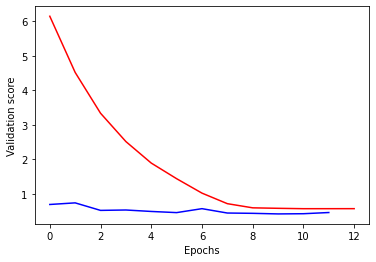

In [8]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


### Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

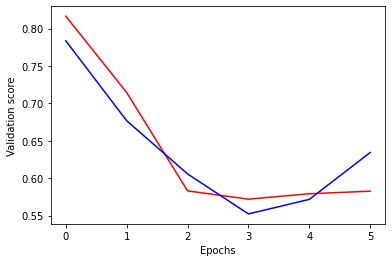

In [9]:
# Create the new model
model_1 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu', input_shape = input_shape))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Experimenting with model structures
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

**Answer: Use more units in each hidden layer.**

### Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from Keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out [Advanced Deep Learning with Keras](https://www.datacamp.com/courses/advanced-deep-learning-with-keras) to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at [Image Processing with Keras in Python](https://www.datacamp.com/courses/image-processing-with-keras-in-python) to learn image-specific applications of Keras.

In [ ]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)